# Income Qualification

### DESCRIPTION

Identify the level of income qualification needed for the families in Latin America.

#### Problem Statement Scenario:
Many social programs have a hard time ensuring that the right people are given enough aid. It’s tricky when a program focuses on the poorest segment of the population. This segment of the population can’t provide the necessary income and expense records to prove that they qualify.

In Latin America, a popular method called Proxy Means Test (PMT) uses an algorithm to verify income qualification. With PMT, agencies use a model that considers a family’s observable household attributes like the material of their walls and ceiling or the assets found in their homes to
classify them and predict their level of need.

While this is an improvement, accuracy remains a problem as the region’s population grows and poverty declines.

The Inter-American Development Bank (IDB)believes that new methods beyond traditional econometrics, based on a dataset of Costa Rican household characteristics, might help improve PMT’s performance.

#### Following actions should be performed:

1) Identify the output variable.

2) Understand the type of data.

3) Check if there are any biases in your dataset.

4) Check whether all members of the house have the same poverty level.

5) Check if there is a house without a family head.

6) Set poverty level of the members and the head of the house within a family.

7) Count how many null values are existing in columns.

8) Remove null value rows of the target variable.

9) Predict the accuracy using random forest classifier.

10) Check the accuracy using random forest with cross validation.

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_validate
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, plot_confusion_matrix

import warnings
warnings.filterwarnings("ignore")

In [72]:
income_train = pd.read_csv("train.csv")

In [73]:
income_test = pd.read_csv("test.csv")

**We will Work on Train and Test Data Simultaneously so that we can make same changes in Test Data that we do in Train Data.**

#### 1) Exploring Data:

In [74]:
income_train.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,190000.0,0,3,0,1,1,0,NaN,0,...,100,1849,1,100,0,1.000000,0.0,100.0,1849,4
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,...,144,4489,1,144,0,1.000000,64.0,144.0,4489,4
2,ID_68de51c94,NaN,0,8,0,1,1,0,NaN,0,...,121,8464,1,0,0,0.250000,64.0,121.0,8464,4
3,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,...,81,289,16,121,4,1.777778,1.0,121.0,289,4
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,...,121,1369,16,121,4,1.777778,1.0,121.0,1369,4


In [75]:
income_test.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq
0,ID_2f6873615,NaN,0,5,0,1,1,0,NaN,1,...,4,0,16,9,0,1,2.25,0.25,272.25,16
1,ID_1c78846d2,NaN,0,5,0,1,1,0,NaN,1,...,41,256,1681,9,0,1,2.25,0.25,272.25,1681
2,ID_e5442cf6a,NaN,0,5,0,1,1,0,NaN,1,...,41,289,1681,9,0,1,2.25,0.25,272.25,1681
3,ID_a8db26a79,NaN,0,14,0,1,1,1,1.0,0,...,59,256,3481,1,256,0,1.00,0.00,256.00,3481
4,ID_a62966799,175000.0,0,4,0,1,1,1,1.0,0,...,18,121,324,1,0,1,0.25,64.00,NaN,324


In [76]:
income_train.columns

Index(['Id', 'v2a1', 'hacdor', 'rooms', 'hacapo', 'v14a', 'refrig', 'v18q',
       'v18q1', 'r4h1',
       ...
       'SQBescolari', 'SQBage', 'SQBhogar_total', 'SQBedjefe', 'SQBhogar_nin',
       'SQBovercrowding', 'SQBdependency', 'SQBmeaned', 'agesq', 'Target'],
      dtype='object', length=143)

In [77]:
income_test.columns

Index(['Id', 'v2a1', 'hacdor', 'rooms', 'hacapo', 'v14a', 'refrig', 'v18q',
       'v18q1', 'r4h1',
       ...
       'age', 'SQBescolari', 'SQBage', 'SQBhogar_total', 'SQBedjefe',
       'SQBhogar_nin', 'SQBovercrowding', 'SQBdependency', 'SQBmeaned',
       'agesq'],
      dtype='object', length=142)

In [78]:
income_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9557 entries, 0 to 9556
Columns: 143 entries, Id to Target
dtypes: float64(8), int64(130), object(5)
memory usage: 10.4+ MB


In [79]:
income_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23856 entries, 0 to 23855
Columns: 142 entries, Id to agesq
dtypes: float64(8), int64(129), object(5)
memory usage: 25.8+ MB


In [80]:
income_train.describe()

,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
count,2.697000e+03,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,2215.000000,9557.000000,9557.000000,...,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9552.000000,9557.000000,9557.000000
mean,1.652316e+05,0.038087,4.955530,0.023648,0.994768,0.957623,0.231767,1.404063,0.385895,1.559171,...,74.222769,1643.774302,19.132887,53.500262,3.844826,3.249485,3.900409,102.588867,1643.774302,3.302292
std,1.504571e+05,0.191417,1.468381,0.151957,0.072145,0.201459,0.421983,0.763131,0.680779,1.036574,...,76.777549,1741.197050,18.751395,78.445804,6.946296,4.129547,12.511831,93.516890,1741.197050,1.009565
min,0.000000e+00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.040000,0.000000,0.000000,0.000000,1.000000
25%,8.000000e+04,0.000000,4.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,...,16.000000,289.000000,9.000000,0.000000,0.000000,1.000000,0.111111,36.000000,289.000000,3.000000
50%,1.300000e+05,0.000000,5.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,...,36.000000,961.000000,16.000000,36.000000,1.000000,2.250000,0.444444,81.000000,961.000000,4.000000
75%,2.000000e+05,0.000000,6.000000,0.000000,1.000000,1.000000,0.000000,2.000000,1.000000,2.000000,...,121.000000,2601.000000,25.000000,81.000000,4.000000,4.000000,1.777778,134.560010,2601.000000,4.000000
max,2.353477e+06,1.000000,11.000000,1.000000,1.000000,1.000000,1.000000,6.000000,5.000000,8.000000,...,441.000000,9409.000000,169.000000,441.000000,81.000000,36.000000,64.000000,1369.000000,9409.000000,4.000000


In [81]:
income_test.describe()

,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,...,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq
count,6.453000e+03,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,5730.000000,23856.000000,23856.000000,...,23856.000000,23856.00000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23825.000000,23856.000000
mean,1.748726e+05,0.050679,4.955776,0.028421,0.992748,0.961603,0.240191,1.348517,0.416541,1.563967,...,34.454183,74.44974,1657.798080,19.113389,54.087232,3.885480,3.564751,4.171669,100.509220,1657.798080
std,1.567887e+05,0.219346,1.539753,0.166174,0.084850,0.192157,0.427208,0.694216,0.713255,0.990171,...,21.696245,76.99701,1753.603406,17.314597,77.312255,6.878967,6.668757,13.105989,89.211063,1753.603406
min,0.000000e+00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.020408,0.000000,0.000000,0.000000
25%,8.000000e+04,0.000000,4.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,...,16.000000,16.00000,256.000000,9.000000,0.000000,0.000000,1.000000,0.111111,36.000000,256.000000
50%,1.400000e+05,0.000000,5.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,...,32.000000,36.00000,1024.000000,16.000000,36.000000,1.000000,2.250000,0.444444,75.111115,1024.000000
75%,2.200000e+05,0.000000,6.000000,0.000000,1.000000,1.000000,0.000000,1.750000,1.000000,2.000000,...,51.000000,121.00000,2601.000000,25.000000,81.000000,4.000000,4.000000,1.777778,132.250000,2601.000000
max,2.852700e+06,1.000000,15.000000,1.000000,1.000000,1.000000,1.000000,6.000000,6.000000,7.000000,...,97.000000,441.00000,9409.000000,169.000000,441.000000,100.000000,169.000000,64.000000,1296.000000,9409.000000


#### 2) Identify the output variable:

In [82]:
# Comparing Columns from Train and Test Data Frame. Whichever Column is Not Present in Test Data is our Target Variable.

In [83]:
temp1 = income_train.columns.tolist()

In [84]:
temp2 = income_test.columns.tolist()

In [85]:
not_matching_colum = []

for i in temp1:
    if i not in temp2:
        not_matching_colum.append(i)

In [86]:
not_matching_colum

['Target']

In [87]:
# So, "Target" Column in Train Data Frame is Our Target/Output Variable.

In [88]:
income_train["Target"].dtypes

dtype('int64')

In [89]:
income_train["Target"].unique()

array([4, 2, 3, 1], dtype=int64)

In [90]:
# So, "Target" is Categorical Variable.

In [91]:
income_train["Target"].value_counts()

4    5996
2    1597
3    1209
1     755
Name: Target, dtype: int64

#### 3) Understand the type of data:

In [92]:
income_train.dtypes

Id                  object
v2a1               float64
hacdor               int64
rooms                int64
hacapo               int64
                    ...   
SQBovercrowding    float64
SQBdependency      float64
SQBmeaned          float64
agesq                int64
Target               int64
Length: 143, dtype: object

In [93]:
income_test.dtypes

Id                  object
v2a1               float64
hacdor               int64
rooms                int64
hacapo               int64
                    ...   
SQBhogar_nin         int64
SQBovercrowding    float64
SQBdependency      float64
SQBmeaned          float64
agesq                int64
Length: 142, dtype: object

In [94]:
income_train.dtypes.value_counts()

int64      130
float64      8
object       5
dtype: int64

In [95]:
income_test.dtypes.value_counts()

int64      129
float64      8
object       5
dtype: int64

In [96]:
# Let's Explore "Object" Data Type First

In [97]:
income_train.select_dtypes("object").columns

Index(['Id', 'idhogar', 'dependency', 'edjefe', 'edjefa'], dtype='object')

In [98]:
income_train["Id"].nunique()

9557

In [99]:
income_test["Id"].nunique()

23856

In [100]:
income_train.shape

(9557, 143)

In [101]:
income_test.shape

(23856, 142)

In [102]:
# Since ID is an Unique Number, We can make it an index.

In [103]:
income_train = income_train.set_index("Id")

In [104]:
income_test = income_test.set_index("Id")

In [105]:
income_train.head()

,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
Id,,,,,,,,,,,,,,,,,,,,,
ID_279628684,190000.0,0,3,0,1,1,0,NaN,0,1,...,100,1849,1,100,0,1.000000,0.0,100.0,1849,4
ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,1,...,144,4489,1,144,0,1.000000,64.0,144.0,4489,4
ID_68de51c94,NaN,0,8,0,1,1,0,NaN,0,0,...,121,8464,1,0,0,0.250000,64.0,121.0,8464,4
ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,2,...,81,289,16,121,4,1.777778,1.0,121.0,289,4
ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,2,...,121,1369,16,121,4,1.777778,1.0,121.0,1369,4


In [106]:
income_test.shape

(23856, 141)

-------------------------------------------------------------------------------------------------------------------------------

In [107]:
income_train["idhogar"].nunique()                                        # idhogar: Household level identifier

2988

In [108]:
income_train["idhogar"].value_counts()

fd8a6d014    13
ae6cf0558    12
0c7436de6    12
b7a0b59d7    11
4476ccd4c    11
             ..
9f6b2b309     1
75226a178     1
1637ac45b     1
0194d569d     1
21eb7fcc1     1
Name: idhogar, Length: 2988, dtype: int64

In [109]:
income_test["idhogar"].nunique()

7352

In [110]:
income_test["idhogar"].value_counts()

8e9159699    13
830539cad    13
9a906088e    13
ef31faf0f    12
7c6740850    11
             ..
c2975df37     1
25e1fff14     1
d6e3f9e9a     1
5a667591a     1
0df790c33     1
Name: idhogar, Length: 7352, dtype: int64

In [111]:
# Applying Lable Encoder to Change Strings to Numbers.

In [112]:
le = LabelEncoder()

In [113]:
income_train["idhogar"] = le.fit_transform(income_train["idhogar"])
income_test["idhogar"] = le.fit_transform(income_test["idhogar"])

In [114]:
income_train["idhogar"].value_counts()

2946    13
2034    12
150     12
2132    11
816     11
        ..
1850     1
1379     1
275      1
18       1
401      1
Name: idhogar, Length: 2988, dtype: int64

In [115]:
income_test["idhogar"].value_counts()

4066    13
3739    13
4393    13
6859    12
3541    11
        ..
5493     1
1039     1
6118     1
2570     1
362      1
Name: idhogar, Length: 7352, dtype: int64

-------------------------------------------------------------------------------------------------------------------------------

In [116]:
income_train["dependency"].unique()                         # dependency : Dependency rate, calculated = (number of members 
                                                            # of the household younger than 19 or older than 64)/(number of 
                                                            # member of household between 19 and 64)

array(['no', '8', 'yes', '3', '.5', '.25', '2', '.66666669', '.33333334',
       '1.5', '.40000001', '.75', '1.25', '.2', '2.5', '1.2', '4',
       '1.3333334', '2.25', '.22222222', '5', '.83333331', '.80000001',
       '6', '3.5', '1.6666666', '.2857143', '1.75', '.71428573',
       '.16666667', '.60000002'], dtype=object)

In [117]:
income_test["dependency"].unique()

array(['.5', 'no', '8', 'yes', '.25', '2', '.33333334', '.375',
       '.60000002', '1.5', '.2', '.75', '.66666669', '3', '.14285715',
       '.40000001', '.80000001', '1.6666666', '.2857143', '1.25', '2.5',
       '5', '.85714287', '1.3333334', '.16666667', '4', '.125',
       '.83333331', '2.3333333', '7', '1.2', '3.5', '2.25', '3.3333333',
       '6'], dtype=object)

In [118]:
# As we can See, There are Only Two Values in Column That are not Numbers.
# Let's Covert them to Numbers.
# Yes = 1, No = 0

In [119]:
income_train["dependency"] = income_train["dependency"].replace({"yes" : 1, "no" : 0})
income_test["dependency"] = income_test["dependency"].replace({"yes" : 1, "no" : 0})

In [120]:
income_train["dependency"] = income_train["dependency"].astype("float")

In [121]:
income_test["dependency"] = income_test["dependency"].astype("float")

In [122]:
income_train["dependency"].unique()

array([0.        , 8.        , 1.        , 3.        , 0.5       ,
       0.25      , 2.        , 0.66666669, 0.33333334, 1.5       ,
       0.40000001, 0.75      , 1.25      , 0.2       , 2.5       ,
       1.2       , 4.        , 1.3333334 , 2.25      , 0.22222222,
       5.        , 0.83333331, 0.80000001, 6.        , 3.5       ,
       1.6666666 , 0.2857143 , 1.75      , 0.71428573, 0.16666667,
       0.60000002])

In [123]:
income_test["dependency"].unique() 

array([0.5       , 0.        , 8.        , 1.        , 0.25      ,
       2.        , 0.33333334, 0.375     , 0.60000002, 1.5       ,
       0.2       , 0.75      , 0.66666669, 3.        , 0.14285715,
       0.40000001, 0.80000001, 1.6666666 , 0.2857143 , 1.25      ,
       2.5       , 5.        , 0.85714287, 1.3333334 , 0.16666667,
       4.        , 0.125     , 0.83333331, 2.3333333 , 7.        ,
       1.2       , 3.5       , 2.25      , 3.3333333 , 6.        ])

-------------------------------------------------------------------------------------------------------------------------------

In [124]:
income_train["edjefe"].unique()

array(['10', '12', 'no', '11', '9', '15', '4', '6', '8', '17', '7', '16',
       '14', '5', '21', '2', '19', 'yes', '3', '18', '13', '20'],
      dtype=object)

In [125]:
income_test["edjefe"].unique()

array(['no', '16', '10', '6', '11', '8', '13', '14', '5', '3', '9', '17',
       '15', '7', '21', '4', '12', '2', '20', 'yes', '19', '18'],
      dtype=object)

In [126]:
# As we can See, There are Only Two Values in Column That are not Numbers.
# Let's Covert them to Numbers.
# Yes = 1, No = 0

In [127]:
income_train["edjefe"] = income_train["edjefe"].replace({"yes" : 1, "no" : 0}).astype("int64")
income_test["edjefe"] = income_test["edjefe"].replace({"yes" : 1, "no" : 0}).astype("int64")

In [128]:
income_train["edjefe"].unique()

array([10, 12,  0, 11,  9, 15,  4,  6,  8, 17,  7, 16, 14,  5, 21,  2, 19,
        1,  3, 18, 13, 20], dtype=int64)

In [129]:
income_test["edjefe"].unique()

array([ 0, 16, 10,  6, 11,  8, 13, 14,  5,  3,  9, 17, 15,  7, 21,  4, 12,
        2, 20,  1, 19, 18], dtype=int64)

-------------------------------------------------------------------------------------------------------------------------------

In [130]:
income_train["edjefa"].unique()

array(['no', '11', '4', '10', '9', '15', '7', '14', '13', '8', '17', '6',
       '5', '3', '16', '19', 'yes', '21', '12', '2', '20', '18'],
      dtype=object)

In [131]:
income_test["edjefa"].unique()

array(['17', 'no', '11', '14', '10', '15', '9', '6', '8', '3', '2', '5',
       '16', '12', 'yes', '7', '13', '21', '4', '19', '18', '20'],
      dtype=object)

In [132]:
# As we can See, There are Only Two Values in Column That are not Numbers.
# Let's Covert them to Numbers.
# Yes = 1, No = 0

In [133]:
income_train["edjefa"] = income_train["edjefa"].replace({"yes" : 1, "no" : 0}).astype("int64")
income_test["edjefa"] = income_test["edjefa"].replace({"yes" : 1, "no" : 0}).astype("int64")

In [134]:
income_train["edjefa"].unique()

array([ 0, 11,  4, 10,  9, 15,  7, 14, 13,  8, 17,  6,  5,  3, 16, 19,  1,
       21, 12,  2, 20, 18], dtype=int64)

In [135]:
income_test["edjefa"].unique()

array([17,  0, 11, 14, 10, 15,  9,  6,  8,  3,  2,  5, 16, 12,  1,  7, 13,
       21,  4, 19, 18, 20], dtype=int64)

-------------------------------------------------------------------------------------------------------------------------------

In [136]:
income_train.dtypes.value_counts()

int64      132
float64      9
int32        1
dtype: int64

In [137]:
income_test.dtypes.value_counts()

int64      131
float64      9
int32        1
dtype: int64

#### 4) Check if there are any biases in your dataset:

In [138]:
# Firstly, let's Check if Target Variable is Class Imbalanced or Not.

In [139]:
income_train["Target"].value_counts()

4    5996
2    1597
3    1209
1     755
Name: Target, dtype: int64

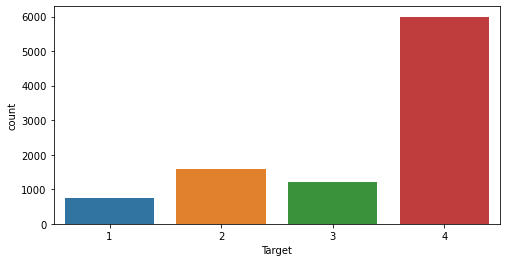

In [140]:
plt.figure(figsize= (8,4))
sns.countplot(income_train["Target"])
plt.show()

In [141]:
# So, Our Dataset is Clearly Class Imbalanced.

-------------------------------------------------------------------------------------------------------------------------------

In [142]:
# Checking For Correlation of All Variables with Target Variable.

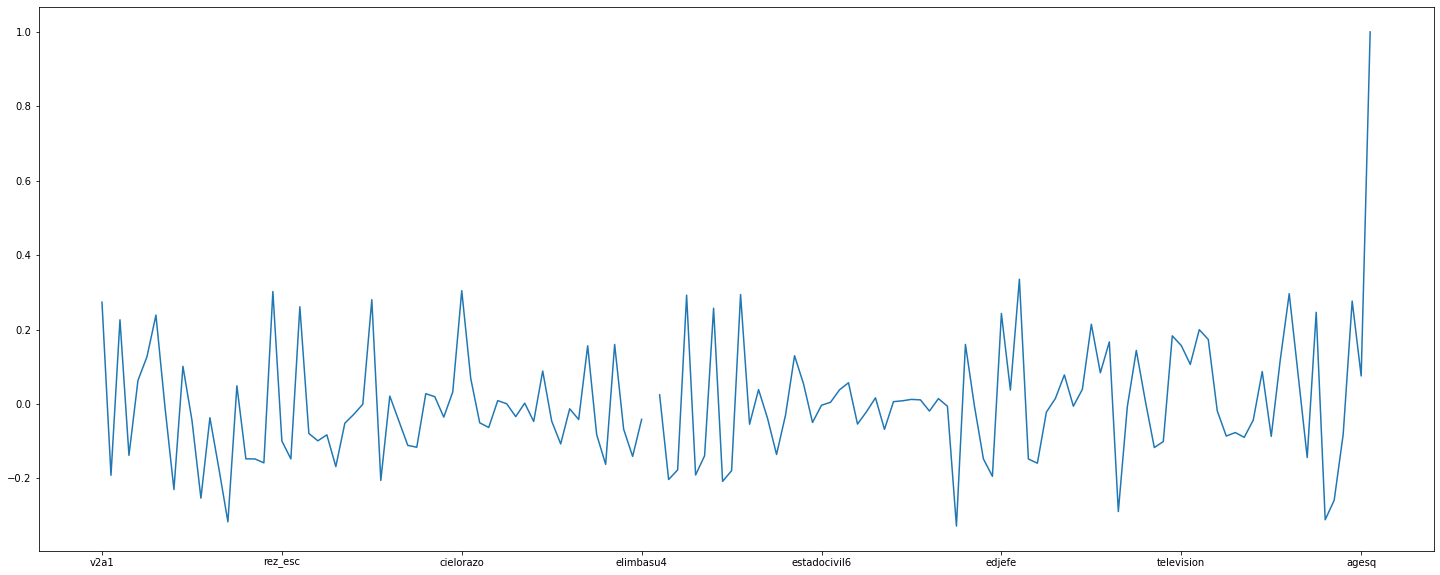

In [143]:
plt.figure(figsize= (25,10))

income_train.corr()["Target"].plot()

plt.show()

In [144]:
# As Seen from The Graph and Data above, None of the Variables Have Correlation Greater Than 0.3 or less Than -0.3 To Target
# Variable. (Last Peek In Graph is Correlation of Target Variable With Itself, which is Obviously 1.)

# So, Our Target Variable is Not Biased Towards any Independent Variable.

-------------------------------------------------------------------------------------------------------------------------------

In [145]:
# Checking For Correlation Between Independent Variables to Avoid Multicolinearity.

In [146]:
corr_matrix = income_train.drop("Target", axis= 1).corr().abs()

In [147]:
corr_matrix

,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,...,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq
v2a1,1.000000,0.091732,0.443461,0.073509,0.033551,0.088970,0.278364,0.302292,0.081900,0.002401,...,0.078897,0.358305,0.062343,0.061309,0.364290,0.082246,0.191915,0.061352,0.402561,0.062343
hacdor,0.091732,1.000000,0.233369,0.652594,0.175011,0.101965,0.084680,0.049262,0.232508,0.059313,...,0.118168,0.109862,0.102725,0.350546,0.082229,0.388043,0.794699,0.005278,0.099153,0.102725
rooms,0.443461,0.233369,1.000000,0.213368,0.129183,0.130531,0.254256,0.208919,0.066578,0.267627,...,0.077046,0.233679,0.068288,0.221595,0.198890,0.007952,0.355526,0.027575,0.250061,0.068288
hacapo,0.073509,0.652594,0.213368,1.000000,0.150986,0.124506,0.067529,0.037414,0.226378,0.126645,...,0.087773,0.092703,0.075528,0.373720,0.071170,0.367025,0.640096,0.014411,0.103324,0.075528
v14a,0.033551,0.175011,0.129183,0.150986,1.000000,0.143143,0.036396,0.011255,0.054769,0.018133,...,0.027193,0.036483,0.023831,0.009100,0.018897,0.015193,0.174969,0.005712,0.034711,0.023831
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SQBhogar_nin,0.082246,0.388043,0.007952,0.367025,0.015193,0.108718,0.050562,0.092212,0.565494,0.124701,...,0.316034,0.181581,0.278921,0.733956,0.049536,1.000000,0.477876,0.049113,0.009591,0.278921
SQBovercrowding,0.191915,0.794699,0.355526,0.640096,0.174969,0.123054,0.125936,0.062806,0.355660,0.144478,...,0.240636,0.201253,0.218349,0.475192,0.106004,0.477876,1.000000,0.049525,0.150997,0.218349
SQBdependency,0.061352,0.005278,0.027575,0.014411,0.005712,0.034080,0.071504,0.033226,0.036977,0.157357,...,0.303847,0.049172,0.395814,0.104255,0.032319,0.049113,0.049525,1.000000,0.065129,0.395814
SQBmeaned,0.402561,0.099153,0.250061,0.103324,0.034711,0.117406,0.302763,0.115522,0.083552,0.062217,...,0.085065,0.510876,0.112386,0.067588,0.470993,0.009591,0.150997,0.065129,1.000000,0.112386


In [148]:
# In this Correlation Matrix, Values above and Below Diagonal are Exactly Same.
# i.e. Coreelation of "v2a1" with "hacdor" is same as Correltion of "hacdor" with "v2a1".

# So, can use Either of the Upper or Traingle for Further Calculation.

https://numpy.org/doc/stable/reference/generated/numpy.triu.html

https://stackoverflow.com/questions/40690854/set-diagonal-triangle-in-pandas-dataframe-to-nan

https://numpy.org/doc/stable/reference/generated/numpy.where.html

In [149]:
corr_matrix.shape

(141, 141)

In [150]:
np.ones(corr_matrix.shape)

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]])

In [151]:
np.triu(np.ones(corr_matrix.shape),k=1)

array([[0., 1., 1., ..., 1., 1., 1.],
       [0., 0., 1., ..., 1., 1., 1.],
       [0., 0., 0., ..., 1., 1., 1.],
       ...,
       [0., 0., 0., ..., 0., 1., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [152]:
(np.triu(np.ones(corr_matrix.shape),k=1).astype(np.bool))

array([[False,  True,  True, ...,  True,  True,  True],
       [False, False,  True, ...,  True,  True,  True],
       [False, False, False, ...,  True,  True,  True],
       ...,
       [False, False, False, ..., False,  True,  True],
       [False, False, False, ..., False, False,  True],
       [False, False, False, ..., False, False, False]])

In [153]:
corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(np.bool))

,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,...,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq
v2a1,NaN,0.091732,0.443461,0.073509,0.033551,0.088970,0.278364,0.302292,0.081900,0.002401,...,0.078897,0.358305,0.062343,0.061309,0.364290,0.082246,0.191915,0.061352,0.402561,0.062343
hacdor,NaN,NaN,0.233369,0.652594,0.175011,0.101965,0.084680,0.049262,0.232508,0.059313,...,0.118168,0.109862,0.102725,0.350546,0.082229,0.388043,0.794699,0.005278,0.099153,0.102725
rooms,NaN,NaN,NaN,0.213368,0.129183,0.130531,0.254256,0.208919,0.066578,0.267627,...,0.077046,0.233679,0.068288,0.221595,0.198890,0.007952,0.355526,0.027575,0.250061,0.068288
hacapo,NaN,NaN,NaN,NaN,0.150986,0.124506,0.067529,0.037414,0.226378,0.126645,...,0.087773,0.092703,0.075528,0.373720,0.071170,0.367025,0.640096,0.014411,0.103324,0.075528
v14a,NaN,NaN,NaN,NaN,NaN,0.143143,0.036396,0.011255,0.054769,0.018133,...,0.027193,0.036483,0.023831,0.009100,0.018897,0.015193,0.174969,0.005712,0.034711,0.023831
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SQBhogar_nin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.477876,0.049113,0.009591,0.278921
SQBovercrowding,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.049525,0.150997,0.218349
SQBdependency,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.065129,0.395814
SQBmeaned,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.112386


In [154]:
Upper_Tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(np.bool))

In [155]:
Upper_Tri

,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,...,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq
v2a1,NaN,0.091732,0.443461,0.073509,0.033551,0.088970,0.278364,0.302292,0.081900,0.002401,...,0.078897,0.358305,0.062343,0.061309,0.364290,0.082246,0.191915,0.061352,0.402561,0.062343
hacdor,NaN,NaN,0.233369,0.652594,0.175011,0.101965,0.084680,0.049262,0.232508,0.059313,...,0.118168,0.109862,0.102725,0.350546,0.082229,0.388043,0.794699,0.005278,0.099153,0.102725
rooms,NaN,NaN,NaN,0.213368,0.129183,0.130531,0.254256,0.208919,0.066578,0.267627,...,0.077046,0.233679,0.068288,0.221595,0.198890,0.007952,0.355526,0.027575,0.250061,0.068288
hacapo,NaN,NaN,NaN,NaN,0.150986,0.124506,0.067529,0.037414,0.226378,0.126645,...,0.087773,0.092703,0.075528,0.373720,0.071170,0.367025,0.640096,0.014411,0.103324,0.075528
v14a,NaN,NaN,NaN,NaN,NaN,0.143143,0.036396,0.011255,0.054769,0.018133,...,0.027193,0.036483,0.023831,0.009100,0.018897,0.015193,0.174969,0.005712,0.034711,0.023831
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SQBhogar_nin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.477876,0.049113,0.009591,0.278921
SQBovercrowding,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.049525,0.150997,0.218349
SQBdependency,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.065129,0.395814
SQBmeaned,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.112386


In [156]:
# Now, we will Choose Colums which have Absolute Correlation Greater Than 0.75(75%) and Drop them from Data 
# to avoid Multicolinearity

In [157]:
Cols_to_drop = []

for i in Upper_Tri.columns:
    if any(Upper_Tri[i] > 0.75):
        Cols_to_drop.append(i)

In [158]:
Cols_to_drop

['r4h3',
 'r4m3',
 'r4t1',
 'r4t2',
 'r4t3',
 'tamhog',
 'tamviv',
 'hhsize',
 'pisocemento',
 'techoentrepiso',
 'abastaguafuera',
 'coopele',
 'sanitario3',
 'energcocinar3',
 'elimbasu3',
 'epared3',
 'etecho3',
 'eviv3',
 'female',
 'hogar_nin',
 'hogar_adul',
 'hogar_total',
 'bedrooms',
 'area2',
 'SQBescolari',
 'SQBage',
 'SQBhogar_total',
 'SQBedjefe',
 'SQBhogar_nin',
 'SQBovercrowding',
 'SQBdependency',
 'SQBmeaned',
 'agesq']

In [159]:
len(Cols_to_drop)

33

In [160]:
# We Will Drop This Columns From Both Train and Test Data.

In [161]:
income_train = income_train.drop(Cols_to_drop, axis= 1)
income_test = income_test.drop(Cols_to_drop, axis= 1)

In [162]:
income_train.shape

(9557, 109)

In [163]:
income_test.shape

(23856, 108)

#### 5) Check whether all members of the house have the same poverty level:

In [164]:
# We will Group the Train Data Using "idhogar" Which is Unique for Each Family and check the Variance in "Target" Varibale 
# for them.
# If Variance of "Target" for Any "idhogar" is > 0, Members of That Family have Different Poverty Level. 

In [165]:
temp = income_train.groupby("idhogar", as_index= False)["Target"].var().sort_values("Target", ascending= False)

In [166]:
temp

,idhogar,Target
1079,1079,1.0
712,712,1.0
2205,2205,0.5
769,769,0.5
977,977,0.5
...,...,...
2957,2957,NaN
2960,2960,NaN
2970,2970,NaN
2975,2975,NaN


In [167]:
# So, there are Some Families Having Members with Different Poverty Level.
# We will Store them in Differetnt Data Frame.

In [168]:
diff_pov_level = temp[temp["Target"] > 0]

In [169]:
diff_pov_level

,idhogar,Target
1079,1079,1.000000
712,712,1.000000
2205,2205,0.500000
769,769,0.500000
977,977,0.500000
...,...,...
523,523,0.166667
836,836,0.166667
808,808,0.166667
2327,2327,0.166667


In [170]:
# So, 85 Families are with Different Poverty Levels among Members.

#### 6) Check if there is a house without a family head:

In [171]:
income_train["parentesco1"].value_counts()

0    6584
1    2973
Name: parentesco1, dtype: int64

In [172]:
income_test["parentesco1"].value_counts()

0    16522
1     7334
Name: parentesco1, dtype: int64

In [173]:
# We will Group the Data Using "idhogar" Which is Unique for Each Family and check the Sum of "parentesco1" Varibale for them.
# If Sum of "parentesco1" for Any "idhogar" is = 0, that House is Without a Family Head. 

In [174]:
temp1 = income_train.groupby("idhogar", as_index= False)["parentesco1"].sum().sort_values("parentesco1")
temp2 = income_test.groupby("idhogar", as_index= False)["parentesco1"].sum().sort_values("parentesco1")

In [175]:
temp1

,idhogar,parentesco1
331,331,0
38,38,0
1143,1143,0
2027,2027,0
230,230,0
...,...,...
1001,1001,1
1002,1002,1
1003,1003,1
994,994,1


In [176]:
temp2

,idhogar,parentesco1
689,689,0
6497,6497,0
6355,6355,0
2570,2570,0
6970,6970,0
...,...,...
2446,2446,1
2445,2445,1
2444,2444,1
2442,2442,1


In [177]:
# So, Both Training and Testing Data have Famlilies Without Family Head.
# We will Store them in Different Data Frame.

In [178]:
without_house_head = pd.concat([temp1, temp2])

In [179]:
without_house_head = without_house_head[without_house_head["parentesco1"] == 0]

In [180]:
without_house_head

,idhogar,parentesco1
331,331,0
38,38,0
1143,1143,0
2027,2027,0
230,230,0
2807,2807,0
1268,1268,0
1613,1613,0
2251,2251,0
2068,2068,0


In [181]:
# So, there are 33 Houses without a Family Head among Train and Test Data.

#### 7) Set poverty level of the members and the head of the house within a family:

In [182]:
temp1 = diff_pov_level["idhogar"].tolist()
temp2 = without_house_head["idhogar"].tolist()

In [183]:
in_both_list = []

for i in temp1:
    if i in temp2:
        in_both_list.append(i)

In [184]:
in_both_list

[]

In [185]:
# So, Families Without a Family Head have No Discrepencies in Poverty Level among Membrers.

# For Families With Family Head, if Family Members have Different Poverty Levels, we will Change it to Poverty Level of
# Family Head.

In [186]:
for id in temp1:
    if income_train.groupby("idhogar").get_group(id)["Target"].var() > 0 :
        poverty_level = income_train[(income_train["idhogar"] == id) & (income_train["parentesco1"] == 1)]["Target"]
        income_train.loc[income_train['idhogar']== id, 'Target'] = float(poverty_level)

In [187]:
# Let's Check If There are Any Families Left with Povert Level Discrepency Amnong Members.

In [188]:
income_train.groupby("idhogar", as_index= False)["Target"].var().sort_values("Target", ascending= False)

,idhogar,Target
0,0,0.0
1964,1964,0.0
1991,1991,0.0
1992,1992,0.0
1993,1993,0.0
...,...,...
2957,2957,NaN
2960,2960,NaN
2970,2970,NaN
2975,2975,NaN


In [189]:
# So, Discepancies in Poverty Level among Members of Same Family is Settled.

#### 8) Count how many null values are existing in columns:

In [190]:
income_train.isnull().sum().sum()

22135

In [191]:
income_test.isnull().sum().sum()

55213

-------------------------------------------------------------------------------------------------------------------------------

In [192]:
for i in income_train.columns:
    if income_train[i].isnull().sum() > 0:
        print(i, income_train[i].isnull().sum() / len(income_train) * 100)

v2a1 71.7798472323951
v18q1 76.82327090091033
rez_esc 82.95490216595167
meaneduc 0.05231767290990897


In [193]:
for i in income_test.columns:
    if income_test[i].isnull().sum() > 0:
        print(i, income_test[i].isnull().sum() / len(income_test) * 100)

v2a1 72.95020120724345
v18q1 75.98088531187123
rez_esc 82.3817907444668
meaneduc 0.12994634473507713


In [194]:
# So, Both Train and Test Data Frames have Missing Values in Same Variables.
# Let's Examine Each of These Variables and Try to Handle Missing Values.

-------------------------------------------------------------------------------------------------------------------------------

In [195]:
# "v2a1" : Monthly rent payment

In [196]:
# Monthly Rent Payment depends on Variables:
# tipovivi1 : =1 own and fully paid house
# tipovivi2 : =1 own, paying in installments
# tipovivi3 : =1 rented
# tipovivi4 : =1 precarious
# tipovivi5 : =1 other(assigned, borrowed)

# i.e. If House is Own and Fully Paid, and Monthly Rent Value is NaN, we can replace that with 0.

In [197]:
income_train[income_train["v2a1"].isnull() == True][["tipovivi1", "tipovivi2", "tipovivi3", "tipovivi4", "tipovivi5"]].sum()

tipovivi1    5911
tipovivi2       0
tipovivi3       0
tipovivi4     163
tipovivi5     786
dtype: int64

In [198]:
# As we can See, Most of The NaN Values in "v2a1" belongs to the Houses that are Owned and Fully Paid.
# For other two Variable, "tipovivi4" and "tipovivi5", we can fill Missing Values of "v2a1" using either Mean or Median.

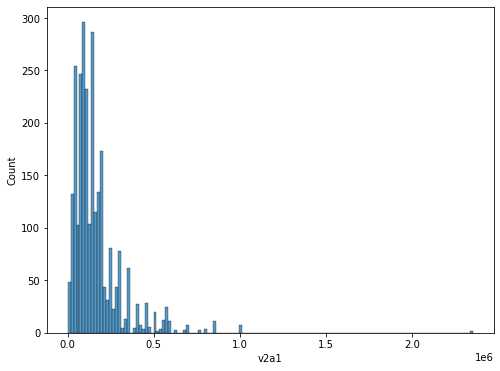

In [199]:
plt.figure(figsize= (8,6))
sns.histplot(income_train["v2a1"])
plt.show()

In [200]:
# The Distribution of "v2a1" is Skewed.
# So, we will Use Median of "v2a1" to fill Missing Values of Category "tipovivi4" and "tipovivi5".

In [201]:
income_train.loc[(income_train["tipovivi1"] ==1), "v2a1"] = 0
income_train.loc[(income_train["tipovivi4"] ==1), "v2a1"] = income_train["v2a1"].median()
income_train.loc[(income_train["tipovivi5"] ==1), "v2a1"] = income_train["v2a1"].median()

In [202]:
income_train["v2a1"].isnull().sum()

0

In [203]:
# Doing Same Steps For Test Data

In [204]:
income_test[income_test["v2a1"].isnull() == True][["tipovivi1", "tipovivi2", "tipovivi3", "tipovivi4", "tipovivi5"]].sum()

tipovivi1    14933
tipovivi2        0
tipovivi3        0
tipovivi4      434
tipovivi5     2036
dtype: int64

In [205]:
# As we can See, Most of The NaN Values in "v2a1" belongs to the Houses that are Owned and Fully Paid.
# For other two Variable, "tipovivi4" and "tipovivi5", we can fill Missing Values of "v2a1" using either Mean or Median.

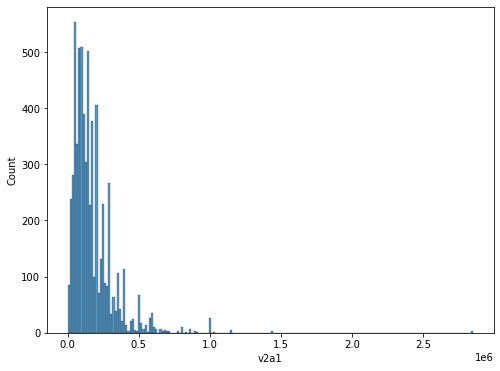

In [206]:
plt.figure(figsize= (8,6))
sns.histplot(income_test["v2a1"])
plt.show()

In [207]:
# The Distribution of "v2a1" is Skewed.
# So, we will Use Median of "v2a1" to fill Missing Values of Category "tipovivi4" and "tipovivi5".

In [208]:
income_test.loc[(income_test["tipovivi1"] ==1), "v2a1"] = 0
income_test.loc[(income_test["tipovivi4"] ==1), "v2a1"] = income_test["v2a1"].median()
income_test.loc[(income_test["tipovivi5"] ==1), "v2a1"] = income_test["v2a1"].median()

In [209]:
income_test["v2a1"].isnull().sum()

0

-------------------------------------------------------------------------------------------------------------------------------

In [210]:
# "v18q1" : number of tablets household owns

In [211]:
# Number of Tablets Owned Depends on Variable:
# v18q : owns a tablet

# i.e. If Family Doesn't Own a Tablet, Number Tablets can be Set to 0 instead of NaN.

In [212]:
income_train[income_train["v18q1"].isnull() == True]["v18q"].sum()

0

In [213]:
# So, all the Missing Values in "v18q1" are for "v18q".
# i.e. Number of Tablets are NaN when Family Doesn't Own a Tablet.
# So, we can Replace all Missing Values in "v18q1" as 0.

In [214]:
income_train["v18q1"] = income_train["v18q1"].fillna(0)

In [215]:
income_train["v18q1"].isnull().sum()

0

In [216]:
# Doing Same Steps for Test Data

In [217]:
income_test[income_test["v18q1"].isnull() == True]["v18q"].sum()

0

In [218]:
# So, all the Missing Values in "v18q1" are for "v18q".
# i.e. Number of Tablets are NaN when Family Doesn't Own a Tablet.
# So, we can Replace all Missing Values in "v18q1" as 0.

In [219]:
income_test["v18q1"] = income_test["v18q1"].fillna(0)

In [220]:
income_test["v18q1"].isnull().sum()

0

-------------------------------------------------------------------------------------------------------------------------------

In [221]:
# "rez_esc" : Years behind in school

In [222]:
# Years behind in school can be realted to the Variable:
# instlevel1 = 1 no level of education
# Age

# i.e. if Value of "rez_esc" is NaN for "instlevel1" = 1, we can fill it with 0.
# if Age<5 or Age>19, we can fill "rez_esc" with 0.

In [223]:
income_train["rez_esc"].isnull().sum()

7928

In [224]:
income_train[income_train["rez_esc"].isnull() == True]["instlevel1"].sum()

1183

In [225]:
# 1183 records have NaN for Years Behind in School when They have No level of Education.

In [226]:
income_train.loc[(income_train["instlevel1"] == 1), "rez_esc"] = 0

In [227]:
income_train.loc[(income_train["rez_esc"].isnull() == True) & ((income_train["age"] < 7) | (income_train["age"] > 19)),
                 "rez_esc"] = 0

In [228]:
income_train["rez_esc"].isnull().sum()

346

In [229]:
# Filling this Missing Values with Mean of "rez_esc"

In [230]:
income_train["rez_esc"] = income_train["rez_esc"].fillna(income_train["rez_esc"].mean())

In [231]:
income_train["rez_esc"].isnull().sum()

0

In [232]:
# Doing Same Steps for Test Data

In [233]:
income_test["rez_esc"].isnull().sum()

19653

In [234]:
income_test[income_test["rez_esc"].isnull() == True]["instlevel1"].sum()

2863

In [235]:
# 2863 records have NaN for Years Behind in School when They have No level of Education.

In [236]:
income_test.loc[(income_test["instlevel1"] == 1), "rez_esc"] = 0

In [237]:
income_test.loc[(income_test["rez_esc"].isnull() == True) & ((income_test["age"] < 7) | (income_test["age"] > 19)),
                 "rez_esc"] = 0

In [238]:
income_test["rez_esc"].isnull().sum()

802

In [239]:
# Filling this Missing Values with Mean of "rez_esc"

In [240]:
income_test["rez_esc"] = income_test["rez_esc"].fillna(income_test["rez_esc"].mean())

In [241]:
income_test["rez_esc"].isnull().sum()

0

-------------------------------------------------------------------------------------------------------------------------------

In [242]:
# meaneduc : average years of education for adults (18+)

In [243]:
# As there are Only 5% Values are Missing here, we can fill them with Mean or Median of Variable.

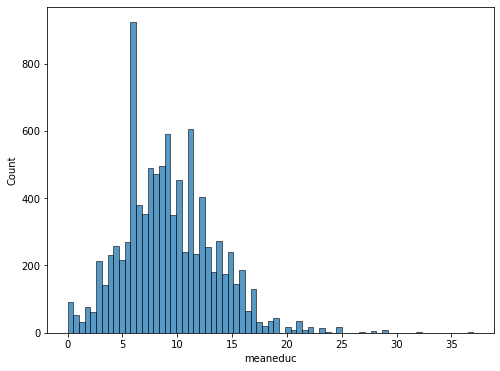

In [244]:
plt.figure(figsize= (8,6))
sns.histplot(income_train["meaneduc"])
plt.show()

In [245]:
income_train["meaneduc"].describe()

count    9552.000000
mean        9.231523
std         4.167694
min         0.000000
25%         6.000000
50%         9.000000
75%        11.600000
max        37.000000
Name: meaneduc, dtype: float64

In [246]:
# As Distribution is Mostly Normal except some Outliers, We will fill Missing Values with Mean.

In [247]:
income_train["meaneduc"] = income_train["meaneduc"].fillna(income_train["meaneduc"].mean())

In [248]:
# Doing Same Steps for Test Data

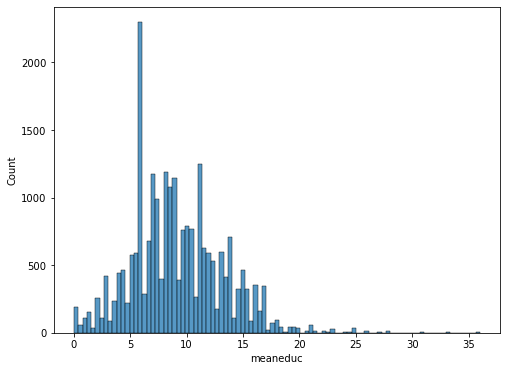

In [249]:
plt.figure(figsize= (8,6))
sns.histplot(income_test["meaneduc"])
plt.show()

In [250]:
income_test["meaneduc"].describe()

count    23825.000000
mean         9.157474
std          4.080513
min          0.000000
25%          6.000000
50%          8.666667
75%         11.500000
max         36.000000
Name: meaneduc, dtype: float64

In [251]:
# As Distribution is Mostly Normal except some Outliers, We will fill Missing Values with Mean.

In [252]:
income_test["meaneduc"] = income_test["meaneduc"].fillna(income_test["meaneduc"].mean())

In [253]:
income_train["meaneduc"].isna().sum()

0

In [254]:
income_test["meaneduc"].isna().sum()

0

#### 9) Remove null value rows of the target variable:

In [255]:
income_train["Target"].isnull().sum()

0

In [256]:
# No Null Values in Target Variable.

#### 10) Train Test Split:

In [257]:
income_train.shape

(9557, 109)

In [258]:
# Features:

x= income_train.drop("Target", axis= 1)

In [259]:
# Target:

y= income_train["Target"]

In [260]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state= 42)

In [261]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(7645, 108)
(1912, 108)
(7645,)
(1912,)


#### 11) Scalling:

In [262]:
# We have to Scale Both Train and Test Data, as Test Data Needs to be in Same Format as Train Data that was Used to Build
# The Model.

In [263]:
sc = StandardScaler()

In [264]:
# Scalling Train Data (x_train, x_test):

In [265]:
temp = sc.fit_transform(x_train)

In [266]:
x_train = pd.DataFrame(temp, index= x_train.index, columns= x_train.columns)
x_train.head()

,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,...,mobilephone,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,age
Id,,,,,,,,,,,,,,,,,,,,,
ID_cf18611af,-0.436006,-0.201397,-0.654642,-0.15878,0.072524,0.210372,-0.544245,-0.461845,-0.571774,-1.505326,...,0.15704,0.113060,-1.191667,-0.317727,-0.257387,-0.301232,-0.322693,3.348501,0.636250,-0.802546
ID_759fc51f0,1.972360,-0.201397,-0.654642,-0.15878,0.072524,0.210372,-0.544245,-0.461845,-0.571774,-0.543020,...,0.15704,-0.562210,0.839161,-0.317727,-0.257387,-0.301232,-0.322693,-0.298641,0.636250,-0.201338
ID_77e2d94b3,-0.436006,-0.201397,0.026090,-0.15878,0.072524,0.210372,1.837409,0.974025,-0.571774,0.419286,...,0.15704,0.788331,0.839161,-0.317727,-0.257387,-0.301232,-0.322693,-0.298641,0.636250,-0.663806
ID_d83a6bf88,0.912679,-0.201397,-0.654642,-0.15878,0.072524,0.210372,-0.544245,-0.461845,0.885782,-0.543020,...,0.15704,0.113060,0.839161,-0.317727,-0.257387,-0.301232,-0.322693,-0.298641,0.636250,0.076142
ID_e6548451e,1.134249,-0.201397,0.706821,-0.15878,0.072524,0.210372,-0.544245,-0.461845,-0.571774,1.381592,...,0.15704,0.788331,-1.191667,-0.317727,-0.257387,-0.301232,-0.322693,3.348501,-1.571709,-0.432572


In [267]:
temp = sc.transform(x_test)
x_test = pd.DataFrame(temp, index= x_test.index, columns= x_test.columns)
x_test.head()

,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,...,mobilephone,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,age
Id,,,,,,,,,,,,,,,,,,,,,
ID_17e173eb0,-0.436006,-0.201397,-0.654642,-0.15878,0.072524,0.210372,-0.544245,-0.461845,-0.571774,-1.505326,...,0.15704,-1.237481,-1.191667,-0.317727,-0.257387,-0.301232,3.098924,-0.298641,-1.571709,1.186065
ID_38b872bd6,-0.436006,-0.201397,-0.654642,-0.15878,0.072524,0.210372,-0.544245,-0.461845,-0.571774,0.419286,...,0.15704,-0.562210,-1.191667,-0.317727,-0.257387,3.319705,-0.322693,-0.298641,-1.571709,-0.571313
ID_39fd34f13,-0.436006,-0.201397,-0.654642,-0.15878,0.072524,0.210372,-0.544245,-0.461845,0.885782,0.419286,...,0.15704,-1.237481,-1.191667,-0.317727,-0.257387,-0.301232,-0.322693,3.348501,-1.571709,-1.172521
ID_90edd74c3,-0.436006,-0.201397,0.026090,-0.15878,0.072524,0.210372,-0.544245,-0.461845,0.885782,-0.543020,...,0.15704,-0.562210,-1.191667,-0.317727,-0.257387,-0.301232,3.098924,-0.298641,-1.571709,0.446117
ID_c35a5a413,-0.436006,-0.201397,0.026090,-0.15878,0.072524,0.210372,-0.544245,-0.461845,0.885782,-0.543020,...,0.15704,-0.562210,-1.191667,-0.317727,-0.257387,3.319705,-0.322693,-0.298641,-1.571709,-1.126274


In [268]:
# Scalling Test Data (income_test):

In [269]:
temp = sc.transform(income_test)
income_test = pd.DataFrame(temp, index= income_test.index, columns= income_test.columns)
income_test.head()

,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,...,mobilephone,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,age
Id,,,,,,,,,,,,,,,,,,,,,
ID_2f6873615,-0.436006,-0.201397,0.026090,-0.15878,0.072524,0.210372,-0.544245,-0.461845,0.885782,-0.543020,...,0.15704,-0.562210,0.839161,-0.317727,-0.257387,-0.301232,-0.322693,-0.298641,0.63625,-1.403755
ID_1c78846d2,-0.436006,-0.201397,0.026090,-0.15878,0.072524,0.210372,-0.544245,-0.461845,0.885782,-0.543020,...,0.15704,-0.562210,0.839161,-0.317727,-0.257387,-0.301232,-0.322693,-0.298641,0.63625,0.307376
ID_e5442cf6a,-0.436006,-0.201397,0.026090,-0.15878,0.072524,0.210372,-0.544245,-0.461845,0.885782,-0.543020,...,0.15704,-0.562210,0.839161,-0.317727,-0.257387,-0.301232,-0.322693,-0.298641,0.63625,0.307376
ID_a8db26a79,-0.436006,-0.201397,6.152677,-0.15878,0.072524,0.210372,1.837409,0.974025,-0.571774,-0.543020,...,0.15704,-0.562210,0.839161,-0.317727,-0.257387,-0.301232,-0.322693,-0.298641,0.63625,1.139818
ID_a62966799,1.249850,-0.201397,-0.654642,-0.15878,0.072524,0.210372,1.837409,0.974025,-0.571774,-1.505326,...,0.15704,-1.237481,0.839161,-0.317727,-0.257387,-0.301232,-0.322693,-0.298641,0.63625,-0.756300


#### 12) Over Sampling:

In [270]:
# As our Target Variable has Class Imbalance, We will Use Over Sampling to Tackle that.

https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html

In [271]:
sm = SMOTE()

In [272]:
x_train_sm, y_train_sm = sm.fit_resample(x_train, y_train)

In [273]:
print(x_train_sm.shape)
print(y_train_sm.shape)

(19280, 108)
(19280,)


#### 13) Random Forest Classifier:

In [274]:
RFC_Model = RandomForestClassifier(n_estimators= 100, n_jobs= -1)

In [275]:
RFC_Model.fit(x_train_sm, y_train_sm)

RandomForestClassifier(n_jobs=-1)

In [276]:
pred = RFC_Model.predict(x_test)

In [277]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           1       0.96      0.91      0.93       169
           2       0.94      0.87      0.90       302
           3       0.99      0.79      0.87       257
           4       0.92      0.99      0.96      1184

    accuracy                           0.94      1912
   macro avg       0.95      0.89      0.92      1912
weighted avg       0.94      0.94      0.93      1912



<Figure size 576x432 with 0 Axes>

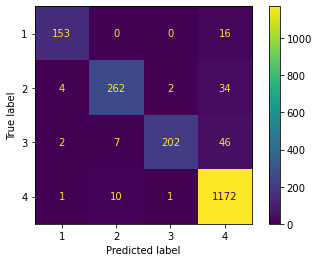

In [278]:
plt.figure(figsize= (8,6))
plot_confusion_matrix(RFC_Model, x_test, y_test)
plt.show()

In [279]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           1       0.96      0.91      0.93       169
           2       0.94      0.87      0.90       302
           3       0.99      0.79      0.87       257
           4       0.92      0.99      0.96      1184

    accuracy                           0.94      1912
   macro avg       0.95      0.89      0.92      1912
weighted avg       0.94      0.94      0.93      1912



#### 14)  Check the accuracy using random forest with cross validation:

In [280]:
# For Cross Validation, we will use full training data (not x_train and y_train):

# For that, first we will have to Scale x and y as we did scalling only after train test split.

# We will also need to Apply Oversampling on x and y after Scalling.

In [281]:
x.head()

,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,...,mobilephone,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,age
Id,,,,,,,,,,,,,,,,,,,,,
ID_279628684,190000.0,0,3,0,1,1,0,0.0,0,1,...,1,1,1,0,0,0,0,0,1,43
ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,1,...,1,1,1,0,0,0,0,0,1,67
ID_68de51c94,0.0,0,8,0,1,1,0,0.0,0,0,...,0,0,1,0,0,0,0,0,1,92
ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,2,...,1,3,1,0,0,0,0,0,1,17
ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,2,...,1,3,1,0,0,0,0,0,1,37


In [282]:
y.head()

Id
ID_279628684    4
ID_f29eb3ddd    4
ID_68de51c94    4
ID_d671db89c    4
ID_d56d6f5f5    4
Name: Target, dtype: int64

In [283]:
x.shape

(9557, 108)

In [284]:
y.shape

(9557,)

In [285]:
# Scalling x:

In [286]:
sc1 = StandardScaler()

In [287]:
temp = sc1.fit_transform(x)
x = pd.DataFrame(temp, index= x.index, columns= x.columns)
x.head()

,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,...,mobilephone,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,age
Id,,,,,,,,,,,,,,,,,,,,,
ID_279628684,1.313389,-0.198986,-1.331829,-0.155629,0.072521,0.210363,-0.549262,-0.466827,-0.566874,-0.539470,...,0.159120,-1.228106,0.837702,-0.319656,-0.257896,-0.300391,-0.321838,-0.296232,0.632039,0.402406
ID_f29eb3ddd,0.809548,-0.198986,-0.650771,-0.155629,0.072521,0.210363,1.820624,0.967727,-0.566874,-0.539470,...,0.159120,-1.228106,0.837702,-0.319656,-0.257896,-0.300391,-0.321838,-0.296232,0.632039,1.512945
ID_68de51c94,-0.427153,-0.198986,2.073460,-0.155629,0.072521,0.210363,-0.549262,-0.466827,-0.566874,-1.504237,...,-6.284565,-1.902337,0.837702,-0.319656,-0.257896,-0.300391,-0.321838,-0.296232,0.632039,2.669756
ID_d671db89c,1.221781,-0.198986,0.030287,-0.155629,0.072521,0.210363,1.820624,0.967727,-0.566874,0.425297,...,0.159120,0.120356,0.837702,-0.319656,-0.257896,-0.300391,-0.321838,-0.296232,0.632039,-0.800678
ID_d56d6f5f5,1.221781,-0.198986,0.030287,-0.155629,0.072521,0.210363,1.820624,0.967727,-0.566874,0.425297,...,0.159120,0.120356,0.837702,-0.319656,-0.257896,-0.300391,-0.321838,-0.296232,0.632039,0.124771


In [288]:
# Applying SMOTE on x and y for Over Sampling:

In [289]:
sm1 = SMOTE()

In [290]:
x_sm, y_sm = sm1.fit_resample(x, y)

In [291]:
print(x_sm.shape)
print(y_sm.shape)

(24016, 108)
(24016,)


In [292]:
# Cross Validation On Random Forest Classifier:

In [293]:
# Note: No need to perform Train Test Split for Cross Validation.

In [294]:
cr_validate = cross_validate(RFC_Model, x_sm, y_sm, cv= 10)

In [295]:
type(cr_validate)

dict

In [296]:
cr_validate.keys()

dict_keys(['fit_time', 'score_time', 'test_score'])

In [297]:
cr_validate

{'fit_time': array([4.18234634, 1.86416841, 1.80156803, 1.83198905, 1.72789645,
        1.70344281, 1.7218492 , 1.6490531 , 1.62656355, 1.6830225 ]),
 'score_time': array([0.05090141, 0.04388213, 0.06224084, 0.06655192, 0.036901  ,
        0.041888  , 0.04061532, 0.0594027 , 0.0502274 , 0.05304337]),
 'test_score': array([0.90840966, 0.93838468, 0.97085762, 0.96294754, 0.97918401,
        0.9683597 , 0.95210329, 0.9396085 , 0.91253644, 0.89046231])}

In [298]:
# We have 10 Test Scores in result as we did 10 fold cross validation using cv=10.

# So, we can simply take Average of all Test Scores to find Average Accuracy of Cross Validation on Random Forest.

In [299]:
cr_validate["test_score"].mean()

0.9422853751264478

In [300]:
# We are Getting 94.42% Accuracy, which is good wnough to Use Model on New Unseen Data (Test file Data) to make Predictions.

#### 15) Making Predictions on Test Data:

In [301]:
# As we have Maniputed The Original Test Data (Unseen Data), Let's Load it Again.

In [302]:
Unseen_Data = pd.read_csv("test.csv")

In [303]:
Unseen_Data.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq
0,ID_2f6873615,NaN,0,5,0,1,1,0,NaN,1,...,4,0,16,9,0,1,2.25,0.25,272.25,16
1,ID_1c78846d2,NaN,0,5,0,1,1,0,NaN,1,...,41,256,1681,9,0,1,2.25,0.25,272.25,1681
2,ID_e5442cf6a,NaN,0,5,0,1,1,0,NaN,1,...,41,289,1681,9,0,1,2.25,0.25,272.25,1681
3,ID_a8db26a79,NaN,0,14,0,1,1,1,1.0,0,...,59,256,3481,1,256,0,1.00,0.00,256.00,3481
4,ID_a62966799,175000.0,0,4,0,1,1,1,1.0,0,...,18,121,324,1,0,1,0.25,64.00,NaN,324


In [304]:
# Making Predictions on Test Data from "income_test" data frame which is in same form as Training Data.

In [305]:
income_test

,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,...,mobilephone,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,age
Id,,,,,,,,,,,,,,,,,,,,,
ID_2f6873615,-0.436006,-0.201397,0.026090,-0.158780,0.072524,0.210372,-0.544245,-0.461845,0.885782,-0.543020,...,0.15704,-0.562210,0.839161,-0.317727,-0.257387,-0.301232,-0.322693,-0.298641,0.636250,-1.403755
ID_1c78846d2,-0.436006,-0.201397,0.026090,-0.158780,0.072524,0.210372,-0.544245,-0.461845,0.885782,-0.543020,...,0.15704,-0.562210,0.839161,-0.317727,-0.257387,-0.301232,-0.322693,-0.298641,0.636250,0.307376
ID_e5442cf6a,-0.436006,-0.201397,0.026090,-0.158780,0.072524,0.210372,-0.544245,-0.461845,0.885782,-0.543020,...,0.15704,-0.562210,0.839161,-0.317727,-0.257387,-0.301232,-0.322693,-0.298641,0.636250,0.307376
ID_a8db26a79,-0.436006,-0.201397,6.152677,-0.158780,0.072524,0.210372,1.837409,0.974025,-0.571774,-0.543020,...,0.15704,-0.562210,0.839161,-0.317727,-0.257387,-0.301232,-0.322693,-0.298641,0.636250,1.139818
ID_a62966799,1.249850,-0.201397,-0.654642,-0.158780,0.072524,0.210372,1.837409,0.974025,-0.571774,-1.505326,...,0.15704,-1.237481,0.839161,-0.317727,-0.257387,-0.301232,-0.322693,-0.298641,0.636250,-0.756300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ID_a065a7cad,-0.436006,4.965316,-2.016106,6.298007,0.072524,0.210372,-0.544245,-0.461845,-0.571774,0.419286,...,0.15704,-1.237481,-1.191667,-0.317727,-0.257387,-0.301232,-0.322693,3.348501,-1.571709,-1.126274
ID_1a7c6953b,-0.436006,-0.201397,-1.335374,-0.158780,0.072524,0.210372,-0.544245,-0.461845,-0.571774,-0.543020,...,0.15704,-0.562210,-1.191667,-0.317727,-0.257387,-0.301232,-0.322693,3.348501,-1.571709,0.908584
ID_07dbb4be2,-0.436006,-0.201397,-1.335374,-0.158780,0.072524,0.210372,-0.544245,-0.461845,-0.571774,-0.543020,...,0.15704,-0.562210,-1.191667,-0.317727,-0.257387,-0.301232,-0.322693,3.348501,-1.571709,-1.033780


In [306]:
x_train_sm.shape

(19280, 108)

In [307]:
income_test.shape

(23856, 108)

In [308]:
test_pred = RFC_Model.predict(income_test)

In [309]:
test_pred

array([4, 4, 4, ..., 4, 4, 2], dtype=int64)

In [310]:
# Attaching Predictions as new column in original Unseen Data:

In [311]:
Unseen_Data["Target"] = test_pred

In [312]:
Unseen_Data.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_2f6873615,NaN,0,5,0,1,1,0,NaN,1,...,0,16,9,0,1,2.25,0.25,272.25,16,4
1,ID_1c78846d2,NaN,0,5,0,1,1,0,NaN,1,...,256,1681,9,0,1,2.25,0.25,272.25,1681,4
2,ID_e5442cf6a,NaN,0,5,0,1,1,0,NaN,1,...,289,1681,9,0,1,2.25,0.25,272.25,1681,4
3,ID_a8db26a79,NaN,0,14,0,1,1,1,1.0,0,...,256,3481,1,256,0,1.00,0.00,256.00,3481,4
4,ID_a62966799,175000.0,0,4,0,1,1,1,1.0,0,...,121,324,1,0,1,0.25,64.00,NaN,324,4


In [313]:
Unseen_Data["Target"].value_counts()

4    18290
2     3672
1     1126
3      768
Name: Target, dtype: int64

### 16) Writing Data with Predictions in Excel File:

In [315]:
Unseen_Data.to_excel("Test With Predictions.xlsx", index= False)